In [7]:
#Paths & enrovironment setup 
import os
from pathlib import Path

REPO_ROOT = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()

if (REPO_ROOT / "configs").exists():
    pass
elif (REPO_ROOT.parent / "configs").exists():
    REPO_ROOT = REPO_ROOT.parent
else:
    raise RuntimeError("Could not locate repo root (configs/ not found)")

os.chdir(REPO_ROOT)
print("Repo root set to:", REPO_ROOT)

Repo root set to: c:\work\protein-function-prediction


In [20]:
#Install required libraries
!python -m pip install -r requirements.txt

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.5 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 2.5 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 2.5 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 2.5 MB/s eta 0:00:02
   ----------------------- ------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#Check configuration pathways 
import yaml
cfg = yaml.safe_load(open("configs/config.yaml"))

print("Aspects:", cfg["run"]["aspects"])
print("Train IDs:", cfg["data"]["train_ids"])
print("Test IDs:", cfg["data"]["test_ids"])
print("Train embeddings:", cfg["data"]["train_embeddings"])
print("Test embeddings:", cfg["data"]["test_embeddings"])


Aspects: ['molecular_function', 'biological_process', 'cellular_component']
Train IDs: data/raw/biological_data_pfp/train/train_ids.txt
Test IDs: data/raw/biological_data_pfp/test/test_ids.txt
Train embeddings: data/raw/biological_data_pfp/train/train_embeddings.h5
Test embeddings: data/raw/biological_data_pfp/test/test_embeddings.h5


In [ ]:
#Check (all) data 
!python scripts/data_check.py

X_train: (123969, 1024) X_test: (1000, 1024)
molecular_function: terms=839, Y=(123969, 839)
biological_process: terms=1487, Y=(123969, 1487)
cellular_component: terms=678, Y=(123969, 678)
X_train: (123969, 1024) X_test: (1000, 1024)
molecular_function: terms=839, Y=(123969, 839)
biological_process: terms=1487, Y=(123969, 1487)
cellular_component: terms=678, Y=(123969, 678)


In [ ]:
#Train model (based on parameters in configs)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

!python scripts/model_train.py

Loading training data...
Embeddings shape: (1000, 1024)

Processing Aspect: molecular_function
Using 839 GO terms
Running cross-validation...
F-max = 0.2636 at threshold ~ 0.54
Training final model with SAGA solver...
Model saved successfully.

Processing Aspect: biological_process
Using 1487 GO terms
Running cross-validation...
F-max = 0.2146 at threshold ~ 0.54
Training final model with SAGA solver...
Model saved successfully.

Processing Aspect: cellular_component
Using 678 GO terms
Running cross-validation...
F-max = 0.3583 at threshold ~ 0.46
Training final model with SAGA solver...
Model saved successfully.

Done. Total time: 0:35:44.052540


c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 16 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 17 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 19 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 20 is present in all training examples.
  warnings.warn(
c:\wor

Loading training data...
Embeddings shape: (1000, 1024)

Processing Aspect: molecular_function
Using 839 GO terms
Running cross-validation...
F-max = 0.0893 at threshold ~ 0.37
Training final model with SAGA solver...
Model saved successfully.

Processing Aspect: biological_process
Using 1487 GO terms
Running cross-validation...
F-max = 0.0985 at threshold ~ 0.37
Training final model with SAGA solver...
Model saved successfully.

Processing Aspect: cellular_component
Using 678 GO terms
Running cross-validation...
F-max = 0.1854 at threshold ~ 0.37
Training final model with SAGA solver...
Model saved successfully.

Done. Total time: 0:18:39.304452


c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 16 is present in all training examples.
  warnings.warn(
c:\work\protein-function-prediction\.venv\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 17 is present in all training examples.
  warnings.warn(
c:\work

Plotting GO term frequency for: molecular_function


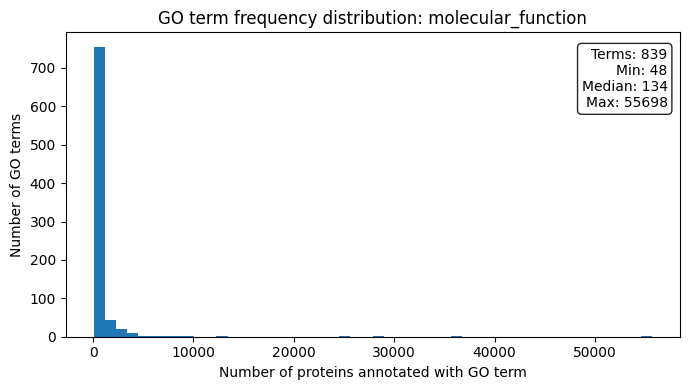

Plotting GO term frequency for: biological_process


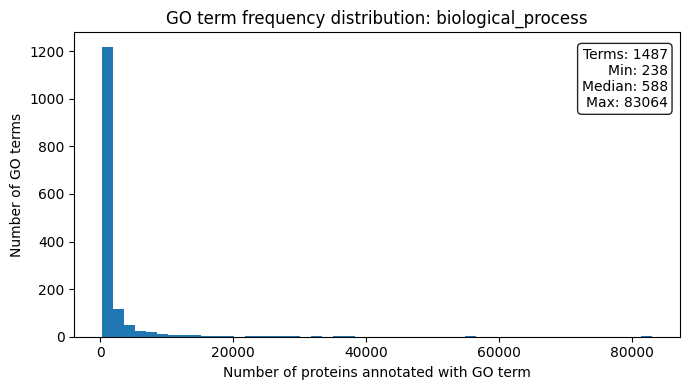

Plotting GO term frequency for: cellular_component


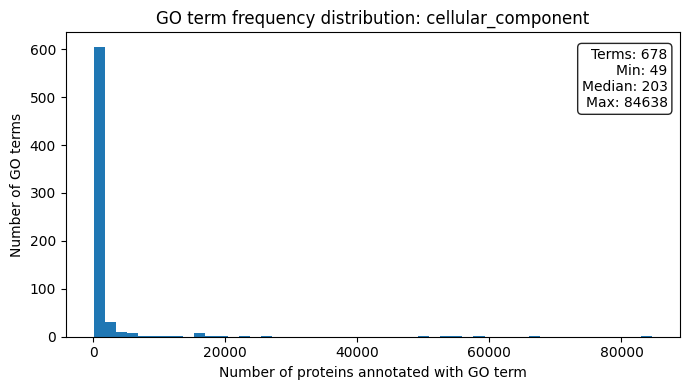

In [ ]:
#Make GO term frequency distribution plots

for aspect in cfg["run"]["aspects"]:
    print(f"Plotting GO term frequency for: {aspect}")

    asp_labels = labels[aspect]
    go_terms, _ = build_label_space(asp_labels)
    term2idx = {t: i for i, t in enumerate(go_terms)}

    Y = build_Y(train_ids, asp_labels, term2idx)
    plot_go_term_frequency_hist(
        Y,
        aspect=aspect,
        bins=50,
        log_y=False
    )

In [ ]:
#Build submission file
!python scripts/build_submission.py

Wrote submission: outputs\submission.txt
Example lines:
O43747 GO:0005768 0.973
O43747 GO:0030659 0.965
O43747 GO:0012506 0.957
O43747 GO:0005911 0.889
O43747 GO:0031982 0.831
O43747 GO:0022804 0.83
O43747 GO:0031410 0.829
O43747 GO:0097708 0.829
O43747 GO:0008092 0.826
O43747 GO:0070161 0.824
